# Quadratic regression

In this post I want to record a derivation of the closed form solution for quadratic 
regression. This exists in many textbooks, but not in form I could find quickly when 
searching the internet (though I am sure a better example exists than this). 

I will attempt to do as much as possible in `sympy` although there is several occasions
it is easier to apply some human simplification.

## Problem definition

Given $n$ data points $x_i, y_i$ we can analytically 
do a quadratic least-squares fitting. It may be worth
first reviewing the [linear case](http://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)
before reading the rest of this. 

We imagine that the data can be written

$$ y_i = a_{0} + a_{1} x_i + a_{2} x_i^{2} + \epsilon_{i} $$

where $\epsilon_{i}$ is the residual between the best-fit and
the data. We want to minimise the sum of squares of this residual; more 
formally:

$$ \textrm{Find}\;\;\;\; \min Q(a_0, a_1, a_2) 
\;\;\;\;\textrm{ for } \;\;\;\;
Q(a_0, a_1, a_2) = \sum_{i}^{n}\epsilon_{i} = 
\sum_{i}^{n} \left(y_i - a_0 - a_1 x_i^{2} - a_2 x_i^{2}\right)^{2}
$$

This can be done analytically by considering the set of equations:
\begin{align} 
\frac{\partial Q}{\partial a_i} = 0 \textrm{ for } i=1,2,3
\end{align}

Differentiate by hand (or look it up in a text-book) to give the three equations:

\begin{align}
n a_0 + a_1  \sum_{i=1}^{n} x_{i} + a_2 \sum_{i=1}^{n} x_{i}^{2} &= \sum_{i=1}^{n} y_{i} \\
a_0 \sum_{i=1}^{n} x_{i} + a_1  \sum_{i=1}^{n} x_{i}^{2} + a_2 \sum_{i=1}^{n} x_{i}^{3} &= \sum_{i=1}^{n} x_{i}y_{i} \\
a_ 0\sum_{i=1}^{n} x_{i}^{2} + a_1  \sum_{i=1}^{n} x_{i}^{3} + a_2 \sum_{i=1}^{n} x_{i}^{4} &= \sum_{i=1}^{n} x_{i}^{2}y_{i} 
\end{align}

From which we may generate a matrix equation

\begin{equation}
\left[\begin{array}{ccc}
n & \sum_{i=1}^{n} x_{i} & \sum_{i=1}^{n} x_{i}^{2} \\
\sum_{i=1}^{n} x_{i} & \sum_{i=1}^{n} x_{i}^{2} & \sum_{i=1}^{n} x_{i}^{3} \\
\sum_{i=1}^{n} x_{i}^{2} & \sum_{i=1}^{n} x_{i}^{3} & \sum_{i=1}^{n} x_{i}^{4}
\end{array}
\right]
\left[\begin{array}{c} a_0 \\ a_1 \\ a_2 \end{array}\right] =
\left[\begin{array}{c} 
\sum_{i=1}^{n} y_i \\ \sum_{i=1}^{n} x_i y_i \\ \sum_{i=1}^{n} x_i^2 y_i \end{array}\right] 
\end{equation}

For convienience we can simplify this by dividing through by $n$ and realising 
that this is simply the average for all of the summation terms:

$$\newcommand{ave}[1]{\langle #1 \rangle} $$

\begin{equation}
\left[\begin{array}{ccc}
n & \ave{x} & \ave{x^{2}} \\
\ave{x} & \ave{x^{2}} & \ave{x^{3}} \\
\ave{x^{2}} & \ave{x^{3}} & \ave{x^{4}}
\end{array}
\right]
\vec{a} =
\left[\begin{array}{c} 
\ave{y} \\ \ave{x y} \\ \ave{x^2 y} \end{array}\right] 
\end{equation}

This is easily understandable by a symbolic maths program such as `sympy`. So 
lets code it up and do the inversion of `A` (the 3x3 matrix) 


### Sympy setup

In [12]:
from sympy import *
from sympy.abc import i
init_printing()

alpha, beta, gamma  = symbols(r'\alpha \beta \gamma')
x_ave, y_ave = symbols(r'\langle{x}\rangle \langle{y}\rangle')
x2_ave, xy_ave = symbols(r'\langle{x^{2}}\rangle \langle{xy}\rangle')
x3_ave, x2y_ave = symbols(r'\langle{x^{3}}\rangle \langle{yx^{2}}\rangle')
x4_ave = symbols(r'\langle{x^{4}}\rangle')

### Construct matrix A

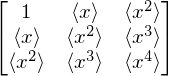

In [13]:
A = Matrix([[1, x_ave, x2_ave], 
            [x_ave, x2_ave, x3_ave],
            [x2_ave, x3_ave, x4_ave]])

A

### Construct b

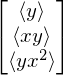

In [14]:
b = Matrix([y_ave, xy_ave, x2y_ave])
b

### Solve for $\vec{a}$

In [15]:
a_vec = A.inv() * b

### The $a_0$ component

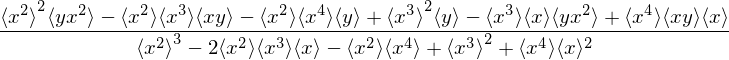

In [16]:
a0 = a_vec[0].simplify()
a0

### The $a_{1}$ component

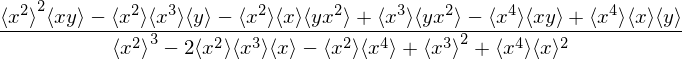

In [17]:
a1 = a_vec[1].simplify()
a1

### The $a_{2}$ component

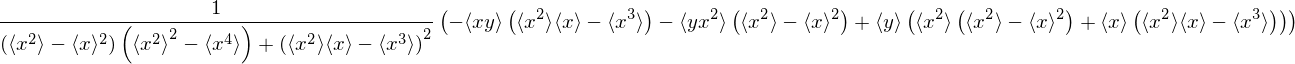

In [18]:
a2 = a_vec[2].simplify()
a2

## Testing
So far it is fairly difficult to say much about these equations. instead lets turn them into
python and see how well they work

In [19]:
# Variable name - I am not using sympy methods as I want them to
# end up as vectorised numpy functions
x_aveP, y_aveP = symbols(r'xA yA')
x2_aveP, xy_aveP = symbols(r'x2A xyA')
x3_aveP, x2y_aveP = symbols(r'x3A x2yA')
x4_aveP = symbols(r'x4A')
to_python_dict = {x_ave: x_aveP, y_ave:y_aveP, x2_ave:x2_aveP, xy_ave:xy_aveP, 
                  x3_ave: x3_aveP, x2y_ave:x2y_aveP, x4_ave:x4_aveP}

In [20]:
print_python(a0.subs(to_python_dict))
print_python(a1.subs(to_python_dict))
print_python(a2.subs(to_python_dict))

x2A = Symbol('x2A')
x2yA = Symbol('x2yA')
x3A = Symbol('x3A')
xyA = Symbol('xyA')
x4A = Symbol('x4A')
yA = Symbol('yA')
xA = Symbol('xA')
e = (x2A**2*x2yA - x2A*x3A*xyA - x2A*x4A*yA - x2yA*x3A*xA + x3A**2*yA + x4A*xA*xyA)/(x2A**3 - 2*x2A*x3A*xA - x2A*x4A + x3A**2 + x4A*xA**2)
x2A = Symbol('x2A')
xyA = Symbol('xyA')
x2yA = Symbol('x2yA')
xA = Symbol('xA')
x3A = Symbol('x3A')
yA = Symbol('yA')
x4A = Symbol('x4A')
e = (x2A**2*xyA - x2A*x2yA*xA - x2A*x3A*yA + x2yA*x3A + x4A*xA*yA - x4A*xyA)/(x2A**3 - 2*x2A*x3A*xA - x2A*x4A + x3A**2 + x4A*xA**2)
x2yA = Symbol('x2yA')
x2A = Symbol('x2A')
xA = Symbol('xA')
xyA = Symbol('xyA')
x3A = Symbol('x3A')
yA = Symbol('yA')
x4A = Symbol('x4A')
e = (-x2yA*(x2A - xA**2) - xyA*(x2A*xA - x3A) + yA*(x2A*(x2A - xA**2) + xA*(x2A*xA - x3A)))/((x2A - xA**2)*(x2A**2 - x4A) + (x2A*xA - x3A)**2)


In [21]:
def QuadraticCoefficients(x, y):
    xA = np.mean(x)
    yA = np.mean(y)
    x2A = np.mean(x**2)
    xyA = np.mean(x*y)
    x2yA = np.mean(x**2 * y)
    x3A = np.mean(x**3)
    x4A = np.mean(x**4)
    
    a0 = ((x2A**2*x2yA - x2A*x3A*xyA - x2A*x4A*yA - x2yA*x3A*xA + x3A**2*yA + x4A*xA*xyA)
          /(x2A**3 - 2*x2A*x3A*xA - x2A*x4A + x3A**2 + x4A*xA**2))
    a1 = ((x2A**2*xyA - x2A*x2yA*xA - x2A*x3A*yA + x2yA*x3A + x4A*xA*yA - x4A*xyA)
          /(x2A**3 - 2*x2A*x3A*xA - x2A*x4A + x3A**2 + x4A*xA**2))
    a2 = ((-x2yA*(x2A - xA**2) - xyA*(x2A*xA - x3A) + yA*(x2A*(x2A - xA**2) + xA*(x2A*xA - x3A)))
          /((x2A - xA**2)*(x2A**2 - x4A) + (x2A*xA - x3A)**2))
    
    return np.array([a0, a1, a2])
    

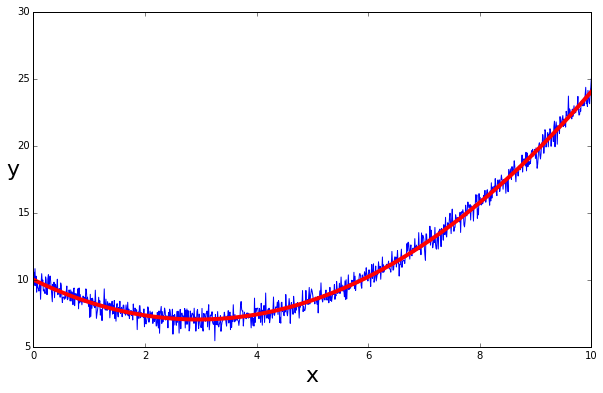

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a_tv = np.array([10.0, -2.0, 0.34])
n = 1000
x_data = np.linspace(0, 10, n)
y_data =  np.polyval(a_tv[[2,1,0]], x_data) + np.random.normal(0, 0.5, n)

a_bf = QuadraticCoefficients(x_data, y_data)
y_bf = np.polyval(a_bf[[2,1,0]], x_data)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_data, y_data, label="Data")
ax.plot(x_data, y_bf, "-r", label="Best fit", lw=4.0)
ax.set_xlabel("x", size=22)
ax.set_ylabel("y", size=22, rotation='horizontal')

plt.show()